In [1]:
import numpy as np
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/X-IIoTID/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/X-IIoTID/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
from sklearn.tree import DecisionTreeClassifier
import keras

best_dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=7, min_samples_split=12)
best_dt.fit(x_train, y_train)

dump(best_dt, "/home/jovyan/X-IIoTID/pre_train/DT.joblib")



2024-04-16 22:15:02.310303: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 22:15:02.346043: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 22:15:02.511720: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 22:15:03.434436: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


['/home/jovyan/X-IIoTID/pre_train/DT.joblib']

epsilon = 0.01
FPR: [1.67848844e-02 1.95904339e-02 0.00000000e+00 8.92326742e-02
 1.03090506e-04 2.06810483e-04 4.38171174e-02 4.47825333e-03
 8.08119410e-02 3.56613032e-05 6.08462374e-03 2.62379007e-01
 2.07286684e-02 7.47712941e-03 6.21625456e-02 3.25448654e-03
 4.06739023e-04 1.07877801e-01 6.55580079e-05]
TPR: [0.2803788  0.17368421 0.99522673 0.56756757 0.88592726 0.8
 0.52315271 0.06772961 0.65465032 0.         0.65407221 0.40394392
 0.59233811 0.03448276 0.37814329 0.11111111 0.05494505 0.10480349
 0.98778419]
FNR: [0.7196212  0.82631579 0.00477327 0.43243243 0.11407274 0.2
 0.47684729 0.93227039 0.34534968 1.         0.34592779 0.59605608
 0.40766189 0.96551724 0.62185671 0.88888889 0.94505495 0.89519651
 0.01221581]
TNR: [0.98321512 0.98040957 1.         0.91076733 0.99989691 0.99979319
 0.95618288 0.99552175 0.91918806 0.99996434 0.99391538 0.73762099
 0.97927133 0.99252287 0.93783745 0.99674551 0.99959326 0.8921222
 0.99993444]
Accuracy: 0.4389003779505099
Precision(micro,ma

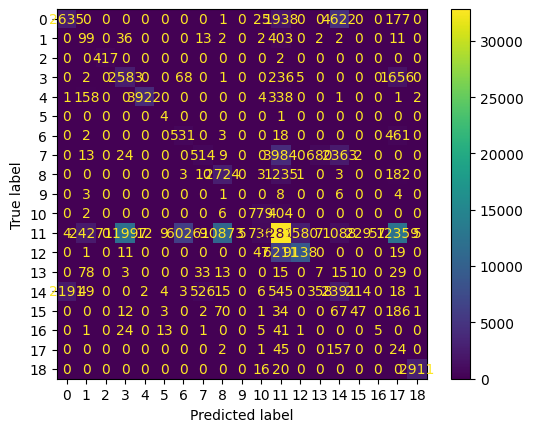

epsilon = 0.1
FPR: [1.17096735e-02 1.01961907e-02 1.37328250e-03 2.33809211e-01
 8.83632909e-05 7.00303084e-03 2.97309916e-02 1.89986505e-03
 1.03219690e-01 2.56761383e-04 8.18115780e-02 5.15875303e-01
 2.76676041e-02 7.14147986e-05 3.47853361e-02 1.40193266e-03
 0.00000000e+00 1.96712881e-02 3.25604773e-03]
TPR: [0.0359651  0.04912281 0.         0.05383432 0.07454258 0.4
 0.         0.00079062 0.5174237  0.         0.03274559 0.33546696
 0.00661178 0.00985222 0.25747272 0.08983452 0.02197802 0.00873362
 0.13573125]
FNR: [0.9640349  0.95087719 1.         0.94616568 0.92545742 0.6
 1.         0.99920938 0.4825763  1.         0.96725441 0.66453304
 0.99338822 0.99014778 0.74252728 0.91016548 0.97802198 0.99126638
 0.86426875]
TNR: [0.98829033 0.98980381 0.99862672 0.76619079 0.99991164 0.99299697
 0.97026901 0.99810013 0.89678031 0.99974324 0.91818842 0.4841247
 0.9723324  0.99992859 0.96521466 0.99859807 1.         0.98032871
 0.99674395]
Accuracy: 0.232247022748342
Precision(micro,macr

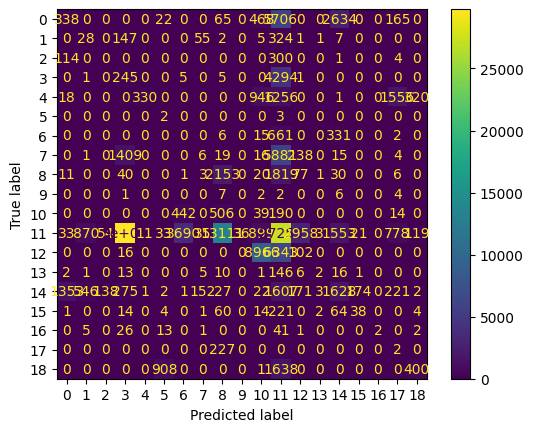

epsilon = 0.2
FPR: [4.46373976e-03 6.34397823e-03 1.37328250e-03 2.63054710e-01
 2.20908227e-05 1.05758602e-02 1.57885285e-02 1.41735964e-03
 1.21871991e-01 2.56761383e-04 1.43794187e-01 4.03095387e-01
 3.65616211e-02 3.57073993e-05 2.40465398e-02 1.40193266e-03
 0.00000000e+00 2.03998543e-02 4.95327171e-04]
TPR: [0.02787827 0.04561404 0.         0.12480773 0.07409081 0.4
 0.         0.00052708 0.46335016 0.         0.10327456 0.28128116
 0.00661178 0.         0.21761822 0.08983452 0.02197802 0.00873362
 0.03189684]
FNR: [0.97212173 0.95438596 1.         0.87519227 0.92590919 0.6
 1.         0.99947292 0.53664984 1.         0.89672544 0.71871884
 0.99338822 1.         0.78238178 0.91016548 0.97802198 0.99126638
 0.96810316]
TNR: [0.99553626 0.99365602 0.99862672 0.73694529 0.99997791 0.98942414
 0.98421147 0.99858264 0.87812801 0.99974324 0.85620581 0.59690461
 0.96343838 0.99996429 0.97595346 0.99859807 1.         0.97960015
 0.99950467]
Accuracy: 0.19757541182343294
Precision(micro,m

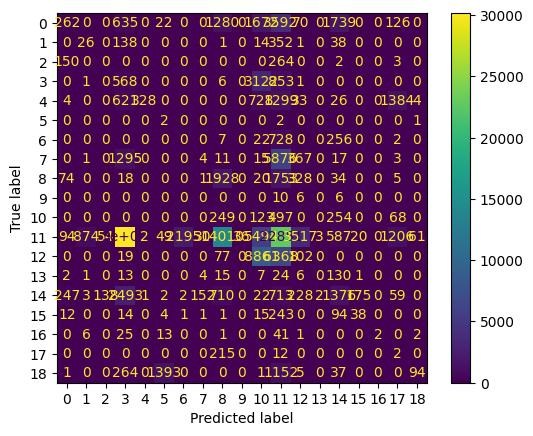

epsilon = 0.3
FPR: [6.34401370e-03 1.13275097e-02 2.32456674e-03 2.66548250e-01
 1.99627401e-02 6.93171688e-03 3.52979205e-02 1.55306429e-03
 1.21835245e-01 1.85438777e-04 1.16499687e-01 3.96467258e-01
 3.73468586e-02 1.29974933e-03 2.28218092e-02 3.57635884e-05
 1.25304162e-02 1.06570667e-02 4.44337609e-04]
TPR: [6.42689934e-02 7.01754386e-03 0.00000000e+00 1.22390683e-01
 7.38649198e-02 4.00000000e-01 0.00000000e+00 1.31769667e-04
 4.40519106e-01 0.00000000e+00 1.02434929e-01 2.49510703e-01
 6.61178453e-03 0.00000000e+00 2.03542622e-01 1.41843972e-02
 2.19780220e-02 0.00000000e+00 1.69664065e-03]
FNR: [0.93573101 0.99298246 1.         0.87760932 0.92613508 0.6
 1.         0.99986823 0.55948089 1.         0.89756507 0.7504893
 0.99338822 1.         0.79645738 0.9858156  0.97802198 1.
 0.99830336]
TNR: [0.99365599 0.98867249 0.99767543 0.73345175 0.98003726 0.99306828
 0.96470208 0.99844694 0.87816475 0.99981456 0.88350031 0.60353274
 0.96265314 0.99870025 0.97717819 0.99996424 0.98746

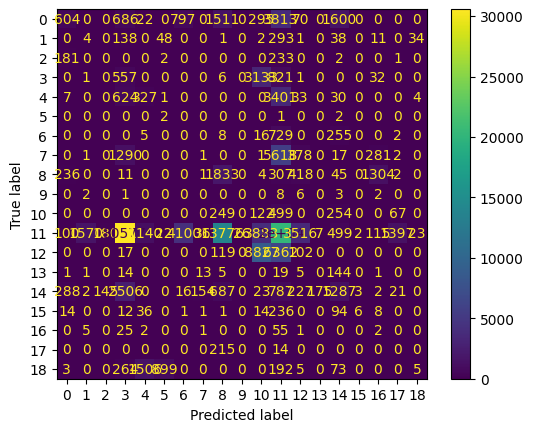

epsilon = 0.01
FPR: [2.34652073e-02 2.90634398e-02 0.00000000e+00 4.40009139e-02
 8.83632909e-05 1.21233732e-04 3.91552634e-02 9.04697643e-04
 6.65765163e-02 3.56613032e-05 9.01185998e-03 2.78110220e-01
 1.83889810e-02 9.99807180e-03 6.21102706e-02 1.64512507e-03
 2.49752032e-04 1.80084428e-01 4.37053386e-05]
TPR: [0.38093211 0.30877193 0.99522673 0.32058888 0.84752654 0.4
 0.25615764 0.02740809 0.66762797 0.         0.97816961 0.37038861
 0.5892915  0.07881773 0.21208287 0.11820331 0.24175824 0.03930131
 0.98303359]
FNR: [0.61906789 0.69122807 0.00477327 0.67941112 0.15247346 0.6
 0.74384236 0.97259191 0.33237203 1.         0.02183039 0.62961139
 0.4107085  0.92118227 0.78791713 0.88179669 0.75824176 0.96069869
 0.01696641]
TNR: [0.97653479 0.97093656 1.         0.95599909 0.99991164 0.99987877
 0.96084474 0.9990953  0.93342348 0.99996434 0.99098814 0.72188978
 0.98161102 0.99000193 0.93788973 0.99835487 0.99975025 0.81991557
 0.99995629]
Accuracy: 0.4087071240105541
Precision(micro,m

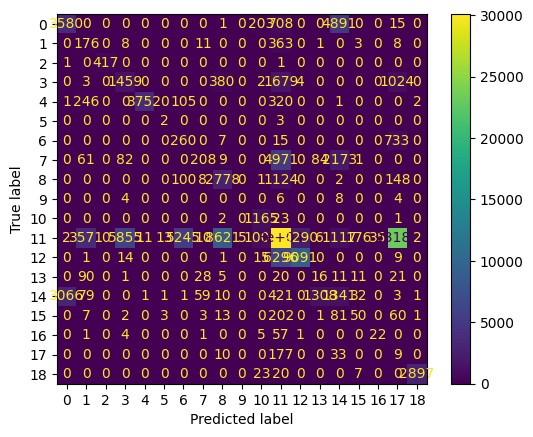

epsilon = 0.1
FPR: [2.22728384e-02 3.98109695e-03 2.14575391e-04 8.43608812e-02
 9.57268985e-05 3.87234801e-03 1.46320440e-02 1.25903755e-03
 1.20799006e-01 4.35067899e-04 6.17021124e-02 5.27487244e-01
 1.03603279e-02 8.28411663e-04 4.87651878e-02 9.44158733e-04
 3.21109755e-04 1.01356419e-02 2.11970892e-02]
TPR: [0.14311556 0.15263158 0.0071599  0.01318392 0.31172351 0.
 0.00197044 0.24232442 0.52415285 0.         0.18219983 0.56863083
 0.01296428 0.02955665 0.00063261 0.05437352 0.08791209 0.
 0.11367492]
FNR: [0.85688444 0.84736842 0.9928401  0.98681608 0.68827649 1.
 0.99802956 0.75767558 0.47584715 1.         0.81780017 0.43136917
 0.98703572 0.97044335 0.99936739 0.94562648 0.91208791 1.
 0.88632508]
TNR: [0.97772716 0.9960189  0.99978542 0.91563912 0.99990427 0.99612765
 0.98536796 0.99874096 0.87920099 0.99956493 0.93829789 0.47251276
 0.98963967 0.99917159 0.95123481 0.99905584 0.99967889 0.98986436
 0.97880291]
Accuracy: 0.38426157027740143
Precision(micro,macro,weighted): 0.

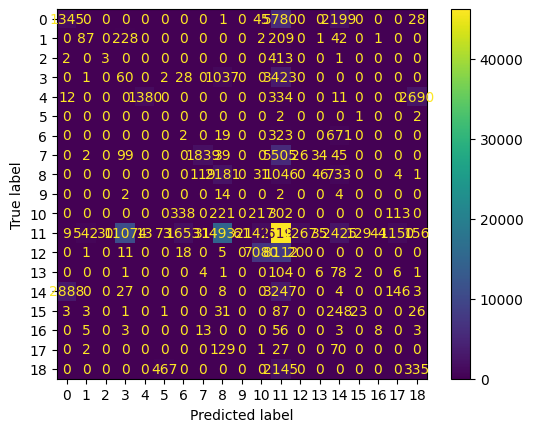

epsilon = 0.2
FPR: [1.29173291e-02 2.70657311e-03 1.71660313e-04 1.62221125e-01
 3.68180379e-05 1.86129435e-02 3.79269475e-03 5.57896880e-04
 1.20019990e-01 3.35216250e-04 1.01201821e-01 3.78023766e-01
 1.46951596e-02 4.64196191e-04 2.69515410e-02 3.21872295e-04
 1.56986991e-04 2.98569296e-03 1.11521456e-02]
TPR: [0.         0.15438596 0.         0.00307625 0.22904902 0.
 0.00098522 0.34009751 0.4628695  0.         0.17884131 0.57532712
 0.         0.         0.00142337 0.08274232 0.03296703 0.01310044
 0.00407194]
FNR: [1.         0.84561404 1.         0.99692375 0.77095098 1.
 0.99901478 0.65990249 0.5371305  1.         0.82115869 0.42467288
 1.         1.         0.99857663 0.91725768 0.96703297 0.98689956
 0.99592806]
TNR: [0.98708267 0.99729343 0.99982834 0.83777888 0.99996318 0.98138706
 0.99620731 0.9994421  0.87998001 0.99966478 0.89879818 0.62197623
 0.98530484 0.9995358  0.97304846 0.99967813 0.99984301 0.99701431
 0.98884785]
Accuracy: 0.3753690365827569
Precision(micro,macr

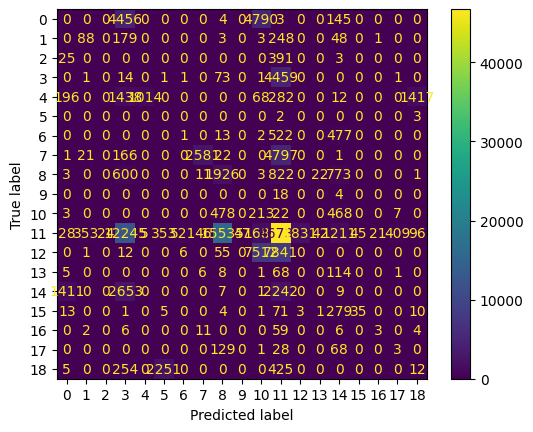

epsilon = 0.3
FPR: [0.01321542 0.00287126 0.00049352 0.12598855 0.00659779 0.02202175
 0.03679201 0.0009047  0.17633701 0.00029242 0.0863211  0.22569545
 0.01855725 0.00224242 0.02512191 0.00036479 0.18806328 0.00227856
 0.00921454]
TPR: [0.         0.09298246 0.         0.00417491 0.01468263 0.
 0.00394089 0.33192779 0.30569575 0.         0.15365239 0.29824345
 0.         0.         0.00142337 0.01654846 0.03296703 0.
 0.00441127]
FNR: [1.         0.90701754 1.         0.99582509 0.98531737 1.
 0.99605911 0.66807221 0.69430425 1.         0.84634761 0.70175655
 1.         1.         0.99857663 0.98345154 0.96703297 1.
 0.99558873]
TNR: [0.98678458 0.99712874 0.99950648 0.87401145 0.99340221 0.97797825
 0.96320799 0.9990953  0.82366299 0.99970758 0.9136789  0.77430455
 0.98144275 0.99775758 0.97487809 0.99963521 0.81193672 0.99772144
 0.99078546]
Accuracy: 0.2023532767596092
Precision(micro,macro,weighted): 0.2023532767596092,0.10448263739835816,0.4305067090472741
F1(micro,macro,weighte

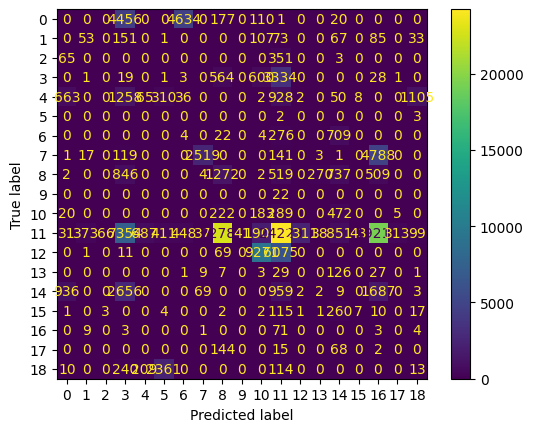

epsilon = 0.01
FPR: [2.34728507e-02 2.87269082e-02 0.00000000e+00 4.21288482e-02
 8.83632909e-05 1.42627919e-04 3.92055454e-02 8.89619348e-04
 6.75098663e-02 2.85290426e-05 8.49401966e-03 2.78194979e-01
 1.79723244e-02 9.99093032e-03 6.20131883e-02 1.62366691e-03
 2.49752032e-04 1.81448704e-01 4.37053386e-05]
TPR: [0.38093211 0.3122807  0.99522673 0.32784004 0.84730066 0.4
 0.25615764 0.02727632 0.66690699 0.         0.97900924 0.37112717
 0.5892915  0.07881773 0.21572039 0.11583924 0.24175824 0.03056769
 0.98303359]
FNR: [0.61906789 0.6877193  0.00477327 0.67215996 0.15269934 0.6
 0.74384236 0.97272368 0.33309301 1.         0.02099076 0.62887283
 0.4107085  0.92118227 0.78427961 0.88416076 0.75824176 0.96943231
 0.01696641]
TNR: [0.97652715 0.97127309 1.         0.95787115 0.99991164 0.99985737
 0.96079445 0.99911038 0.93249013 0.99997147 0.99150598 0.72180502
 0.98202768 0.99000907 0.93798681 0.99837633 0.99975025 0.8185513
 0.99995629]
Accuracy: 0.40949868073878626
Precision(micro,m

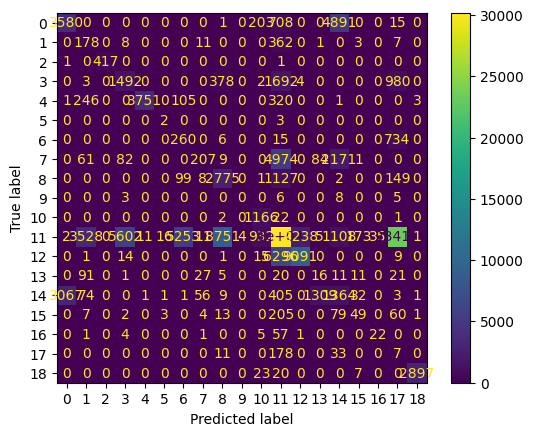

epsilon = 0.1
FPR: [2.22575517e-02 2.09079192e-03 1.35897748e-04 8.21866317e-02
 1.10454114e-04 4.52843644e-03 1.63847287e-02 1.31935073e-03
 9.17108232e-02 1.64041995e-04 5.96091744e-02 5.28436541e-01
 7.40366818e-03 7.35572425e-04 4.82349690e-02 6.65202744e-04
 1.49851219e-04 8.82850837e-03 2.13791948e-02]
TPR: [1.38965737e-01 1.54385965e-01 7.15990453e-03 1.49417710e-02
 3.10368195e-01 0.00000000e+00 9.85221675e-04 2.39425484e-01
 5.40735400e-01 0.00000000e+00 1.70445004e-01 6.32097884e-01
 1.41958903e-02 3.44827586e-02 4.74458327e-04 3.07328605e-02
 7.69230769e-02 0.00000000e+00 1.03834408e-01]
FNR: [0.86103426 0.84561404 0.9928401  0.98505823 0.6896318  1.
 0.99901478 0.76057452 0.4592646  1.         0.829555   0.36790212
 0.98580411 0.96551724 0.99952554 0.96926714 0.92307692 1.
 0.89616559]
TNR: [0.97774245 0.99790921 0.9998641  0.91781337 0.99988955 0.99547156
 0.98361527 0.99868065 0.90828918 0.99983596 0.94039083 0.47156346
 0.99259633 0.99926443 0.95176503 0.9993348  0.99985

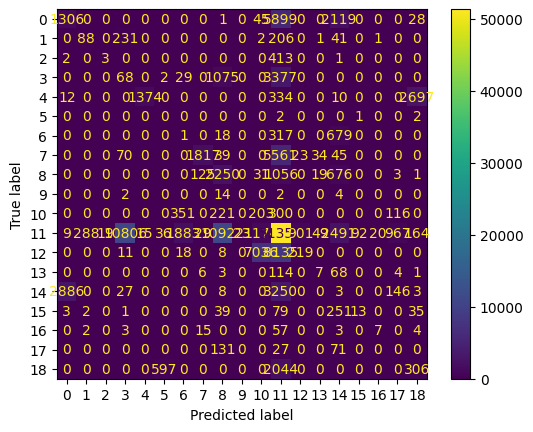

epsilon = 0.2
FPR: [1.15262321e-02 1.63969641e-03 2.50337956e-04 1.79261345e-01
 3.68180379e-05 2.13442681e-02 1.64493769e-03 4.67427115e-04
 1.18439909e-01 4.13671117e-04 9.82961615e-02 3.73887542e-01
 1.41422882e-02 3.42791033e-04 2.51667202e-02 4.07704907e-04
 7.84934957e-05 4.00711423e-03 8.45698302e-03]
TPR: [0.         0.15438596 0.         0.00307625 0.2276937  0.
 0.00098522 0.34009751 0.46383081 0.         0.17884131 0.56696907
 0.         0.         0.00110707 0.07565012 0.03296703 0.01310044
 0.01255514]
FNR: [1.         0.84561404 1.         0.99692375 0.7723063  1.
 0.99901478 0.65990249 0.53616919 1.         0.82115869 0.43303093
 1.         1.         0.99889293 0.92434988 0.96703297 0.98689956
 0.98744486]
TNR: [0.98847377 0.9983603  0.99974966 0.82073866 0.99996318 0.97865573
 0.99835506 0.99953257 0.88156009 0.99958633 0.90170384 0.62611246
 0.98585771 0.99965721 0.97483328 0.9995923  0.99992151 0.99599289
 0.99154302]
Accuracy: 0.3706553519218427
Precision(micro,macr

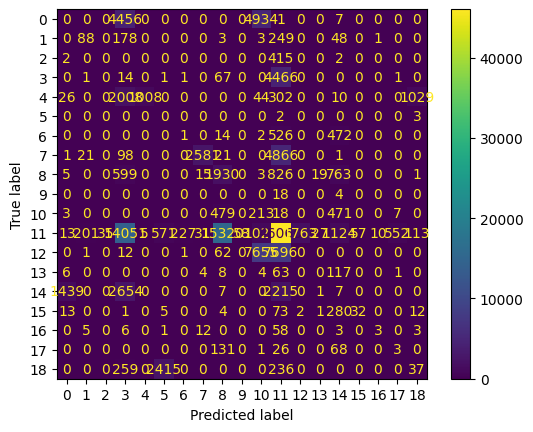

epsilon = 0.3
FPR: [9.03448698e-03 2.03350995e-03 3.36168113e-04 1.40567074e-01
 7.10588131e-03 2.26921020e-02 3.44359444e-02 3.01565881e-04
 1.81731327e-01 1.71174255e-04 8.26890297e-02 2.22474615e-01
 1.92142817e-02 3.46361773e-03 2.55849209e-02 4.86384802e-04
 1.93143950e-01 3.02140699e-03 1.09627558e-02]
TPR: [0.         0.09298246 0.         0.00417491 0.00248475 0.
 0.00492611 0.33192779 0.30857967 0.         0.14441646 0.26872561
 0.         0.         0.         0.0141844  0.05494505 0.
 0.00475059]
FNR: [1.         0.90701754 1.         0.99582509 0.99751525 1.
 0.99507389 0.66807221 0.69142033 1.         0.85558354 0.73127439
 1.         1.         1.         0.9858156  0.94505495 1.
 0.99524941]
TNR: [0.99096551 0.99796649 0.99966383 0.85943293 0.99289412 0.9773079
 0.96556406 0.99969843 0.81826867 0.99982883 0.91731097 0.77752539
 0.98078572 0.99653638 0.97441508 0.99951362 0.80685605 0.99697859
 0.98903724]
Accuracy: 0.18483206161306426
Precision(micro,macro,weighted): 0.1

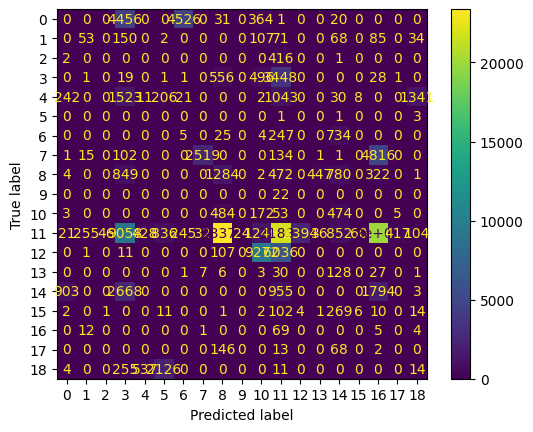

epsilon = 1e-07
FPR: [7.10070931e-03 8.49205213e-03 3.57625652e-05 6.94654294e-02
 1.54635759e-04 1.42627919e-03 2.33092698e-02 6.33288350e-03
 9.76636853e-02 7.13226064e-06 3.40480009e-02 3.02503772e-01
 2.18904994e-02 1.29974933e-03 4.62485158e-02 1.83824844e-03
 6.13676421e-04 5.45710388e-03 1.29149276e-02]
TPR: [0.4355182  0.23859649 0.54653938 0.67919139 0.45177321 0.8
 0.72315271 0.13585453 0.68589281 0.09090909 0.23005877 0.60379867
 0.42866403 0.14778325 0.5984501  0.10874704 0.15384615 0.10043668
 0.85273159]
FNR: [0.5644818  0.76140351 0.45346062 0.32080861 0.54822679 0.2
 0.27684729 0.86414547 0.31410719 0.90909091 0.76994123 0.39620133
 0.57133597 0.85221675 0.4015499  0.89125296 0.84615385 0.89956332
 0.14726841]
TNR: [0.99289929 0.99150795 0.99996424 0.93053457 0.99984536 0.99857372
 0.97669073 0.99366712 0.90233631 0.99999287 0.965952   0.69749623
 0.9781095  0.99870025 0.95375148 0.99816175 0.99938632 0.9945429
 0.98708507]
Accuracy: 0.5456963559865935
Precision(micro,m

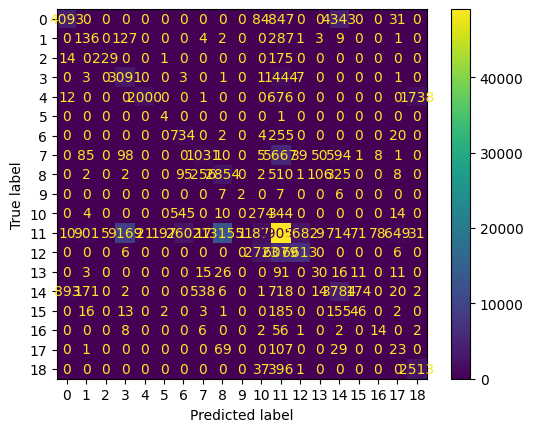

epsilon = 1e-06
FPR: [7.10070931e-03 8.49205213e-03 3.57625652e-05 6.94654294e-02
 1.54635759e-04 1.42627919e-03 2.33092698e-02 6.33288350e-03
 9.76636853e-02 7.13226064e-06 3.40480009e-02 3.02503772e-01
 2.18904994e-02 1.29974933e-03 4.62485158e-02 1.83824844e-03
 6.13676421e-04 5.45710388e-03 1.29149276e-02]
TPR: [0.4355182  0.23859649 0.54653938 0.67919139 0.45177321 0.8
 0.72315271 0.13585453 0.68589281 0.09090909 0.23005877 0.60379867
 0.42866403 0.14778325 0.5984501  0.10874704 0.15384615 0.10043668
 0.85273159]
FNR: [0.5644818  0.76140351 0.45346062 0.32080861 0.54822679 0.2
 0.27684729 0.86414547 0.31410719 0.90909091 0.76994123 0.39620133
 0.57133597 0.85221675 0.4015499  0.89125296 0.84615385 0.89956332
 0.14726841]
TNR: [0.99289929 0.99150795 0.99996424 0.93053457 0.99984536 0.99857372
 0.97669073 0.99366712 0.90233631 0.99999287 0.965952   0.69749623
 0.9781095  0.99870025 0.95375148 0.99816175 0.99938632 0.9945429
 0.98708507]
Accuracy: 0.5456963559865935
Precision(micro,m

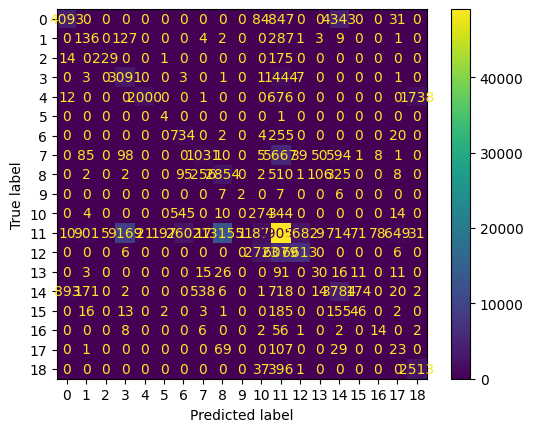

epsilon = 1e-05
FPR: [7.10070931e-03 8.49205213e-03 3.57625652e-05 6.94654294e-02
 1.54635759e-04 1.42627919e-03 2.33092698e-02 6.33288350e-03
 9.76636853e-02 7.13226064e-06 3.40480009e-02 3.02503772e-01
 2.18904994e-02 1.29974933e-03 4.62485158e-02 1.83824844e-03
 6.13676421e-04 5.45710388e-03 1.29149276e-02]
TPR: [0.4355182  0.23859649 0.54653938 0.67919139 0.45177321 0.8
 0.72315271 0.13585453 0.68589281 0.09090909 0.23005877 0.60379867
 0.42866403 0.14778325 0.5984501  0.10874704 0.15384615 0.10043668
 0.85273159]
FNR: [0.5644818  0.76140351 0.45346062 0.32080861 0.54822679 0.2
 0.27684729 0.86414547 0.31410719 0.90909091 0.76994123 0.39620133
 0.57133597 0.85221675 0.4015499  0.89125296 0.84615385 0.89956332
 0.14726841]
TNR: [0.99289929 0.99150795 0.99996424 0.93053457 0.99984536 0.99857372
 0.97669073 0.99366712 0.90233631 0.99999287 0.965952   0.69749623
 0.9781095  0.99870025 0.95375148 0.99816175 0.99938632 0.9945429
 0.98708507]
Accuracy: 0.5456963559865935
Precision(micro,m

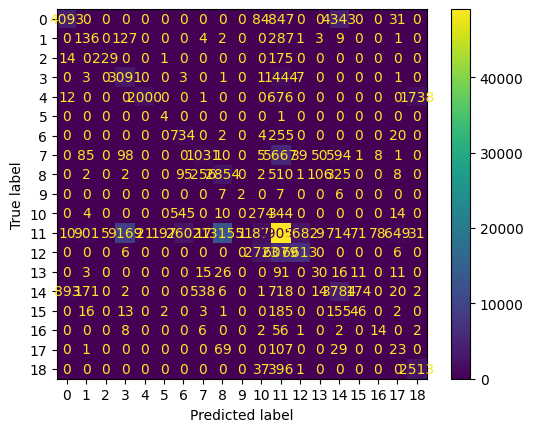

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_DF_eps_0.0001.npy'

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, best_dt, "DT", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, best_dt, "DT", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, best_dt, "DT", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, best_dt, "DT", "DF", epsilon)